<a href="https://colab.research.google.com/github/TheBrightestHoneyRay/B2/blob/master/dog_breed_sol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Flatten, Dropout, BatchNormalization

import h5py

In [0]:
traindf = pd.read_csv('/content/drive/My Drive/deep_learning_hw/labels.csv')
testdf=pd.read_csv('/content/drive/My Drive/deep_learning_hw/sample_submission.csv')

In [0]:
traindf.isnull().values.any()

False

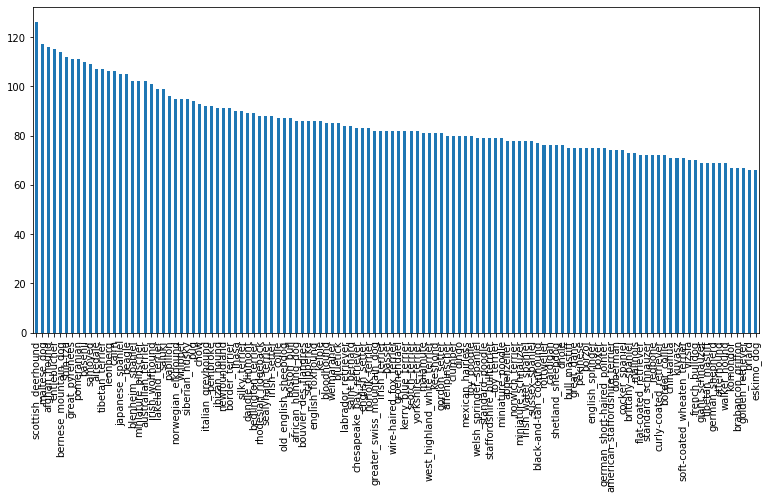

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
traindf['breed'].value_counts().plot(kind='bar')
plt.show()

In [0]:
def class_percentages(labels):
    class_map={}
    for i in labels:
        if str(i) not in class_map:
            class_map[str(i)]=1
        else:
            class_map[str(i)]+=1
    #     print(class_map)
    return class_map


In [0]:
p = class_percentages(traindf.breed.values)

In [0]:
print("Class with maximum images-"+str(max(p, key=p.get))+"  "+str(p[max(p, key=p.get)]))
print("Class with maximum images-"+str(min(p,key=p.get)) +"  "+str(p[min(p, key=p.get)]))

Class with maximum images-scottish_deerhound  126
Class with maximum images-eskimo_dog  66


In [0]:
traindf.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [0]:
traindf

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [0]:
num_classes = 120

In [0]:
resnet_weights_path = '/content/drive/My Drive/deep_learning_hw/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [0]:
my_new_model = Sequential()


In [0]:
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))


In [0]:
my_new_model.add(Dense(512))
my_new_model.add(Activation('relu'))
my_new_model.add(Dropout(0.5))
my_new_model.add(Dense(num_classes, activation='softmax'))


In [0]:
my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224
datagen = ImageDataGenerator(preprocessing_function = preprocess_input, 
                             rescale = 1./255.,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split = 0.2)

In [0]:
train_generator = datagen.flow_from_dataframe(
                        dataframe = traindf,
                        directory = "/content/drive/My Drive/deep_learning_hw/train.zip",
                        x_col = "id",
                        y_col = "breed",
                        has_ext = False,
                        subset = "training",
                        batch_size = 32,
                        seed = 50,
                        shuffle = True,
                        class_mode = "categorical",
                        target_size = (image_size, image_size))

In [0]:
valid_generator = datagen.flow_from_dataframe(
                        dataframe = traindf,
                        directory = "/content/drive/My Drive/deep_learning_hw/train.zip",
                        x_col = "id",
                        y_col = "breed",
                        has_ext = False,
                        subset = "validation",
                        batch_size = 1,
                        seed = 42,
                        shuffle = True,
                        class_mode = "categorical",
                        target_size = (image_size, image_size))

In [0]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
                            dataframe = testdf,
                            directory = "/content/drive/My Drive/deep_learning_hw/test.zip",
                            x_col = "id",
                            y_col = None,
                            has_ext = False,
                            batch_size = 1,
                            seed = 42,
                            shuffle = False,
                            class_mode = None,
                            target_size = (image_size, image_size))

Found 0 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 10357 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=valid_generator.n

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

my_new_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=3
)

In [0]:
my_new_model.evaluate_generator(generator=valid_generator)

In [0]:
test_generator.reset()
pred=my_new_model.predict_generator(test_generator,verbose=1)

In [0]:
labels = (train_generator.class_indices)
labels = list(labels.keys())
df = pd.DataFrame(data=pred,
                 columns=labels)

columns = list(df)
columns.sort()
df = df.reindex(columns=columns)

filenames = testdf["id"]
df["id"]  = filenames

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head(5)

In [0]:
df.to_csv("submission.csv",index=False)